# Проектная работа

**Цель исследования:**
1. Приоритизация подготовленных гипотез.
<br>
2. Анализ результатов A/B-теста.

**Ход исследования:**
 1. Использование методов ICE и RICE для приоритезации гипотез .
 2. Анализ A/B-теста с помощью графиков и расчета различных параметров.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

## Часть 1. Приоритизация гипотез.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

In [4]:
pd.options.display.max_colwidth = 1
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Расчитаем параметр ICE**

In [5]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [6]:
hypothesis['ICE'] = round(hypothesis['ICE'], 3)

In [7]:
hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


**Самыми перспективными гипотезами, по параметру ICE являются:**
<br>
    1)Запустить акцию, дающую скидку на товар в день рождения<br>
    2)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
    3)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Расчитаем параметр RICE**

In [8]:
hypothesis['RICE'] = hypothesis['impact']*hypothesis['confidence']*hypothesis['reach']/hypothesis['efforts']

In [9]:
hypothesis.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Самыми перспективными гипотезами, по параметру RICE являются:**
<br>
    1)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br>
    2)Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа<br>
    3)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
    4)Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**При приоритизации гипотез с помощью метода RICE, используется параметр reach, который влияет на результат, поэтому есть разница в топах гипотез, составленных по фреймворкам ICE и RICE**

## Часть 2. Анализ A/B-теста

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True )

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
orders.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

In [18]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Проверим, есть ли пользователи, оказавшиеся в обеих группах одновременно.**

In [21]:
orders['visitor_id'].nunique()

1031

In [22]:
orders.pivot_table(index='group', values='visitor_id', aggfunc='nunique').sum()

visitor_id    1089
dtype: int64

**Количество уникальных пользователей во всей таблице и сумма уникальных пользователей в каждой группе отличаются, значит у нас есть пользователи, попавшие в обе группы, удалим их.**

In [23]:
for v_id in list(orders.query('group=="B"')['visitor_id']):
    if v_id in list(orders.query('group=="A"')['visitor_id']):
        orders = orders.query('visitor_id!=@v_id')   

In [24]:
orders.groupby('group')['visitor_id'].nunique().sum()

973

In [25]:
orders['visitor_id'].nunique()

973

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [27]:
orders['date'].nunique()

31

**По итогу предобработки данных в таблицах не было обнаружено очевидных дубликатов, названия столбцов были изменены в соответствии с "хорошим стилем", были изменены типы данных в столбцах с датами, также были удалены данные по пользователям, оказавшихся в обеих сравниваемых группах.**

### Построим график кумулятивной выручки по дням и группам. 

In [28]:
#Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
                                                                  
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

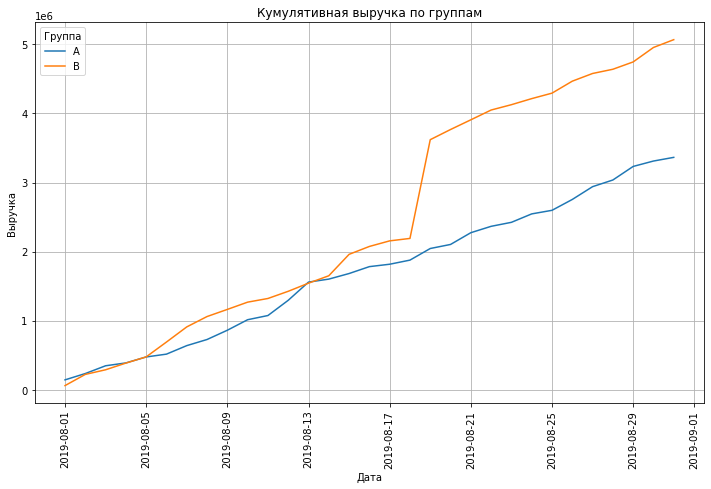

In [29]:
plt.figure(figsize=(12,7))

#Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.legend(title='Группа') 
plt.grid()
plt.xlabel('Дата'), plt.ylabel('Выручка')
plt.xticks(rotation = 90);

**Выручка группы А практически равномерно увеличивается на протяжении всего промежутка времени, а выручка группы B в одном моменте резко выросла и увеличила свой отрыв от группы A, это может свидетельствовать об очень больших заказах.**

### Построим график график кумулятивного среднего чека по группам. 

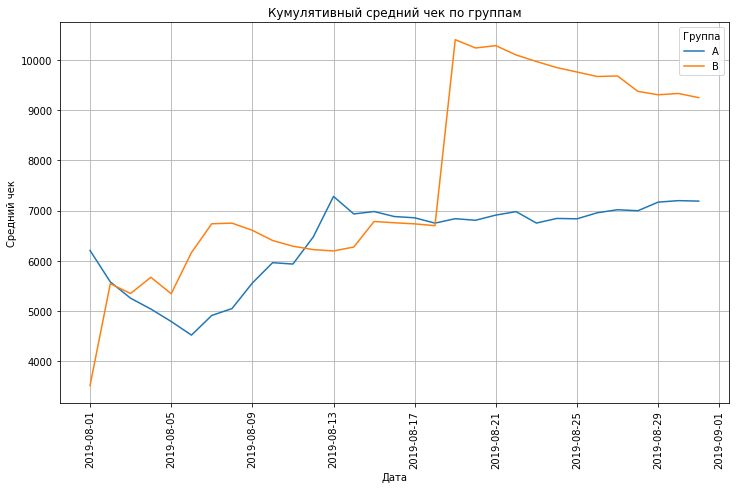

In [30]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.legend(title='Группа') 
plt.grid()
plt.xlabel('Дата'), plt.ylabel('Средний чек')
plt.xticks(rotation = 90);

**Средний чек по группам сильно колеблется, для группы A во второй половине эксперимента он стал относительно стабильным.** 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [31]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

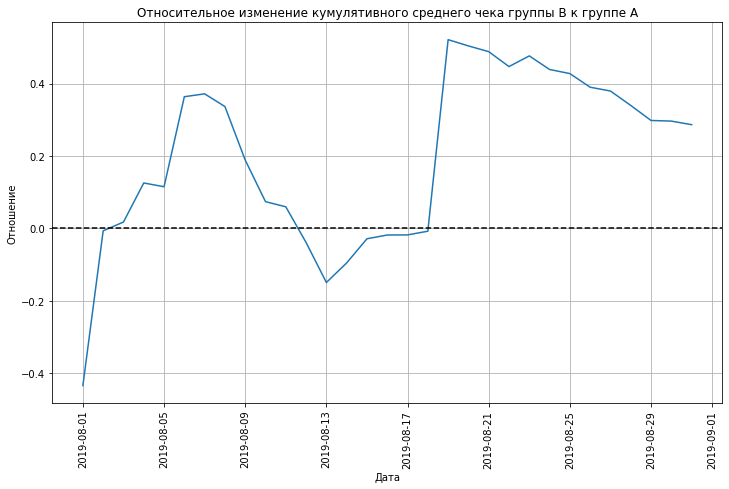

In [32]:
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A') 
plt.grid()
plt.xlabel('Дата'), plt.ylabel('Отношение')
plt.xticks(rotation = 90);

**График сильно скачет, в некоторые даты отношение средних чеков резко меняется, что говорит о выбросах.**

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

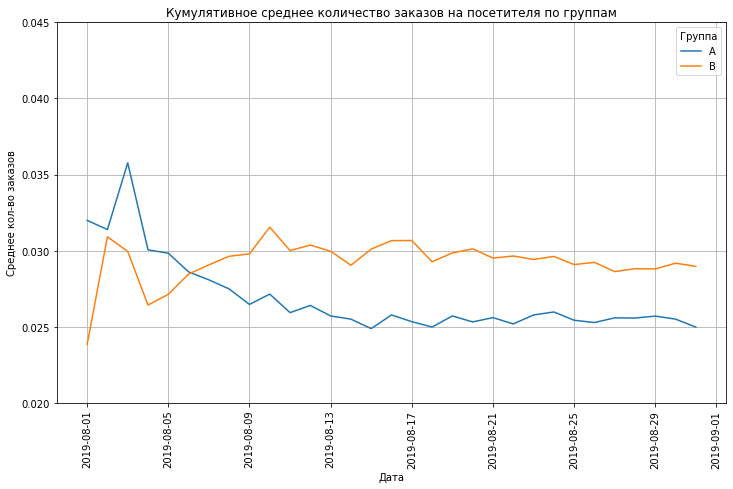

In [33]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(title='Группа')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам') 
plt.grid()
plt.xlabel('Дата'), plt.ylabel('Среднее кол-во заказов')
plt.xticks(rotation = 90);
plt.axis(ymin = 0.02, ymax = 0.045);

**В начале эксперимента среднее количество заказов на пользователя в группе A выше, чем в группе B, но достаточно быстро этот показатель в группе B вырывается вверх и колеблется в районе 3%, среднее количество заказов в группе A находится в районе 2.5%, разница меджу группами незначительная.**

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

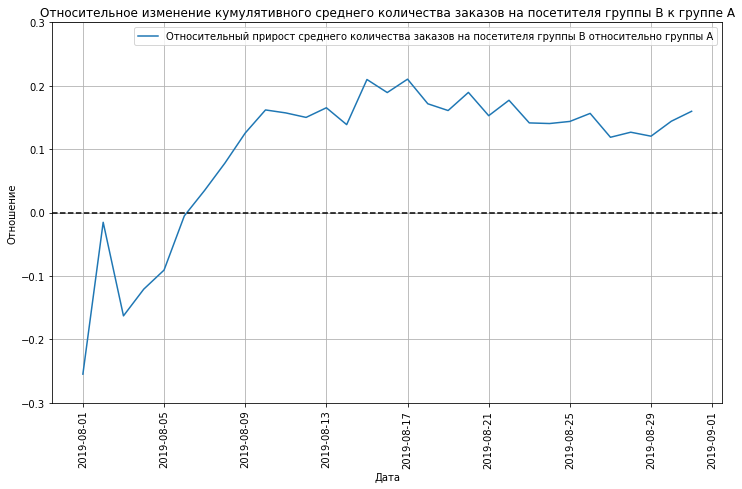

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A') 
plt.grid()
plt.xlabel('Дата'), plt.ylabel('Отношение')
plt.xticks(rotation = 90);
plt.axis(ymin = 0.02, ymax = 0.045);
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(ymin = -0.3, ymax = 0.3);

**В начале группа B была хуже группы A чуть более, чем на 10 процентов, но практически сразу вырвалась вперед, хоть и среднее количество заказов на посетителя определенное время падало, но в конце параметр снова начал расти, в среднем прирост колеблется между 10 и 20%.**

### Построим точечный график количества заказов по пользователям. 

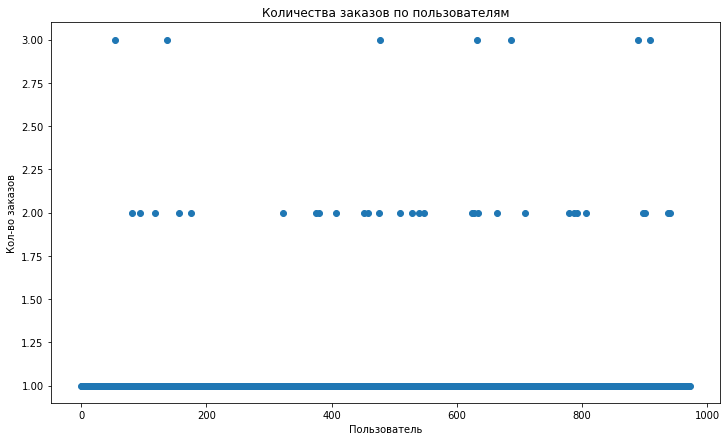

In [35]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количества заказов по пользователям') 
plt.xlabel('Пользователь'), plt.ylabel('Кол-во заказов');

**Большинство пользователей с одним заказом, пользователей с тремя и более заказами совсем мало, они скорее всего являются выбросами, пользователей с двумя заказами больше, но они также могут быть аномалиями.**

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [36]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

**10% пользователей заказали более 1 раза, 5% заказали также более одного раз. Будем считать, что пользователи, заказавшие товар более двух раз, являются выбросами**

### Построим точечный график стоимостей заказов. 

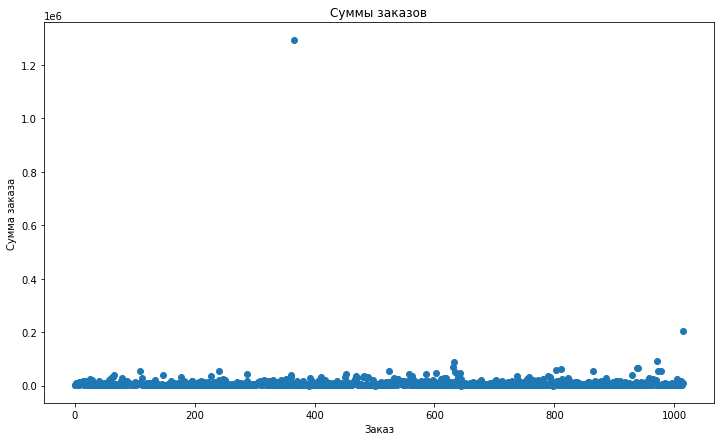

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue']) 
plt.title('Суммы заказов') 
plt.xlabel('Заказ'), plt.ylabel('Сумма заказа');

**По графику не понятно, какие заказы считать выбросами, изменим мастаб по оси y.**

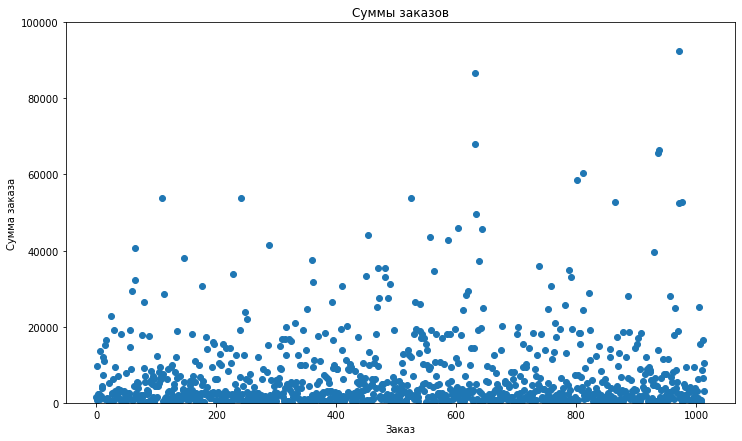

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue']) 
plt.title('Суммы заказов') 
plt.xlabel('Заказ'), plt.ylabel('Сумма заказа');
plt.axis(ymin = 0, ymax = 100000);

**Заказов, свыше 40000 не так много, скорее всего это выбросы.**

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [39]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

**10% пользователей совершали заказы дороже 17990, 5% - дороже 26785. Примем 30000 за верхнюю границу и заказы выше этой суммы будем считать за выбросы.**  

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [40]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Сформулируем гипотезы:<br>
    Нулевая: различий в среднем количестве заказов между группами нет. <br>
    Альтернативная: различия в среднем между группами есть.<br>
    
Примем за критический уровень статистической значимости alpha = 0.05.<br>

Для проверки гипотез будем использовать критерий Манна-Уитни.

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительный прирост: 0.160


**По «сырым» данным в среднем числе заказов групп A и B есть статистически значимые различия: p-value = 0.017 меньше 0.05, т.е. отвергаем нулевую гипотезу, относительный выигрыш группы B равен 16%.**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Гипотезы:<br>
Нулевая гипотеза: различий в среднем чеке между группами нет. <br>Альтернативная гипотеза: различия в среднем чеке между группами есть. 
    
Примем за критический уровень статистической значимости alpha = 0.05.<br>

Для проверки гипотез будем использовать критерий Манна-Уитни.

In [42]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Относительный прирост: 0.287


**P-value значительно больше 0.05, значит стистически значимых различий в средних чеках между группами нет, нулевую гипотезу не отвертаем, хоть и средний чек группы B выше среднего чека группы A почти на 29%.**

In [43]:
#Находим аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Всего аномальных пользователей:', len(abnormalUsers))

Всего аномальных пользователей: 49


In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [45]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.010
Относительный прирост: 0.187


**По очищенным данным в среднем количестве заказов также есть различия, группы B лучше группы A.**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [46]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост:'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.741
Относительный прирост:-0.027


**P-value не сильно изменился, но разница между группами изменилась на 32 процента.**

### Решение по результатам теста

**Тест завершен, по его результатам группы A и B практически не имеют различий в средней сумме заказа, но среднее количество заказов в группе B больше, значит выручка в группе B также больше, поэтому фиксируем победу B.**

## Вывод

**В исходных данных были обнаружены и исправлены проблемы: были изменены названия столбцов в соответствии с "хорошим стилем", изменены типы данных в столбцах с данными, были удалены данные по пользователям, оказавшимся в обеих тестируемых группах, явных дубликатов обнаружено не было.**<br>

**Была проведена приоритезация гипотез, По фреймворку ICE, самыми перспективными гипотезами оказались:<br>
1)Запустить акцию, дающую скидку на товар в день рождения<br>
2)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
3)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**<br>

**По фреймворку RICE самыми перспективными гипотезами являются:**<br>
**1)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**<br>
**2)Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**<br>
**3)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**<br>
**4)Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**
**<br>

**В ходе анализа A/B-теста было выяснено, что выручка группы B выше, чем группы A.** <br>

**Средние чеки на протяжении теста сильно колебались в обеих группах, но в группе B этот показатель выше.<br>
Среднее количество заказов в начале теста было выше в группе A, но практически сразу группа B вырвалась вперед и сохраняла лидирующую позицию по этому показателю до конца эксперимента.**

**В данных были обнаружены выбросы: пользователи с более, чем двумя покупками и заказы, более чем на 30000 оказались аномалиями.**
<br>

**По "сырым данным" между группами выявились различия в среднем числе заказов, относительный выигрыш группы B оказался равен 16%. В средних чеках значимых различий не было обнаружено.**<br>

**По "очищенным данным" ситуация схожая: разницы в средних суммах заказов нет, но группа B выигрывает по среднему числу заказов, из-за чего был сделан вывод, что тест необходимо завершить, группа B оказалась выигрышней.** 